In [ ]:
1.数据集已上传至data文件夹中，具体文件为bike.csv。请使用pandas库读取该文件。

2.id属性对构建回归预测模型没有帮助，请剔除掉该列。

3.我们暂不考虑不同城市对单车租用的影响，请筛选出上海市的所有数据，然后剔除city列。

4.为简化数据，请将hour列中原来6点-18点统一为1；19点-次日5点统一为0。

5.y列为单车租用数量，是我们的预测目标（标签），请将该列提取出来，并转换为一个numpy列向量，将原先的y列剔除。

6.请将DataFrame对象转换为Numpy数组，方便后续操作。

7.请按照训练集与测试集8:2的比例将原始数据集划分。

8.请分别对训练集数据、训练集标签、测试集数据和测试集标签进行归一化。

9.请先构建一个线性回归模型（多元一次函数），然后利用训练集训练模型。

10.利用测试集对训练好的模型进行评估。提示：使用predict(data_array)方法输入测试集，该函数返回值为模型预测值。

11.模型评估：请使用均方根误差（RMSE）作为评估指标，并输出RMSE值。

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. 读取数据
data = pd.read_csv(r'C:\Users\光影PRO\Desktop\DaSE\导论\bike.csv')
print("读取数据后的前5行：")
print(data.head())

# 2. 删除'id'列
data = data.drop(columns=['id'])
print("\n删除'id'列后的数据：")
print(data.head())

# 3. 筛选出上海市的所有数据并删除'city'列
shanghai_data = data[data['city'] == 1].drop(columns=['city'])
print("\n筛选出上海市并删除'city'列后的数据：")
print(shanghai_data.head())

# 4. 将hour列中原来6点-18点统一为1；19点-次日5点统一为0
shanghai_data['hour'] = shanghai_data['hour'].apply(lambda x: 1 if 6 <= x <= 18 else 0)

# 5. 提取y列（单车租用数量）并转换为numpy数组，删除原y列
y = shanghai_data['y'].values
shanghai_data = shanghai_data.drop(columns=['y'])
print("\n提取'y'列后的目标变量y：")
print(y[:5])

# 6. 将DataFrame对象转换为Numpy数组
X = shanghai_data.values
print("\n转换后的特征数据X（前5行）：")
print(X[:5])

# 7. 划分训练集和测试集（80%训练集，20%测试集）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\n划分后的训练集和测试集：")
print(f"X_train形状: {X_train.shape}, X_test形状: {X_test.shape}")
print(f"y_train形状: {y_train.shape}, y_test形状: {y_test.shape}")

# 8. 对训练集和测试集数据以及标签进行归一化处理
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

print("\n归一化处理后的训练集数据（前5行）：")
print(X_train_scaled[:5])

# 9. 构建线性回归模型并进行训练
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

# 10. 使用测试集进行预测
y_pred_scaled = model.predict(X_test_scaled)

# 11. 计算RMSE
rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
print(f'\n RMSE: {rmse}')


读取数据后的前5行：
   id  city  hour  is_workday  weather  temp_air  temp_body  wind   y
0   1     0    22           1        2       3.0        0.7     0  15
1   2     0    10           1        1      21.0       24.9     3  48
2   3     0     0           1        1      25.3       27.4     0  21
3   4     0     7           0        1      15.7       16.2     0  11
4   5     1    10           1        1      21.1       25.0     2  39

删除'id'列后的数据：
   city  hour  is_workday  weather  temp_air  temp_body  wind   y
0     0    22           1        2       3.0        0.7     0  15
1     0    10           1        1      21.0       24.9     3  48
2     0     0           1        1      25.3       27.4     0  21
3     0     7           0        1      15.7       16.2     0  11
4     1    10           1        1      21.1       25.0     2  39

筛选出上海市并删除'city'列后的数据：
    hour  is_workday  weather  temp_air  temp_body  wind   y
4     10           1        1      21.1       25.0     2  39
5      0      

数据集包含 150 样本和 4 特征
特征名称：['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
目标类别名称：['setosa' 'versicolor' 'virginica']
训练集样本数：120, 测试集样本数：30


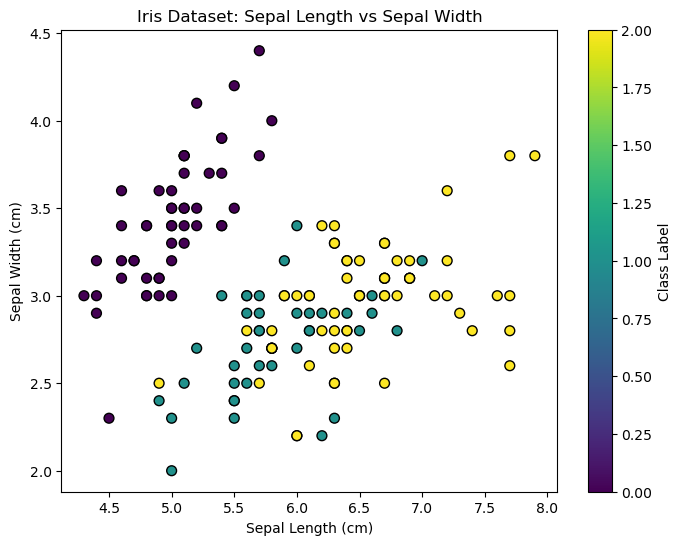

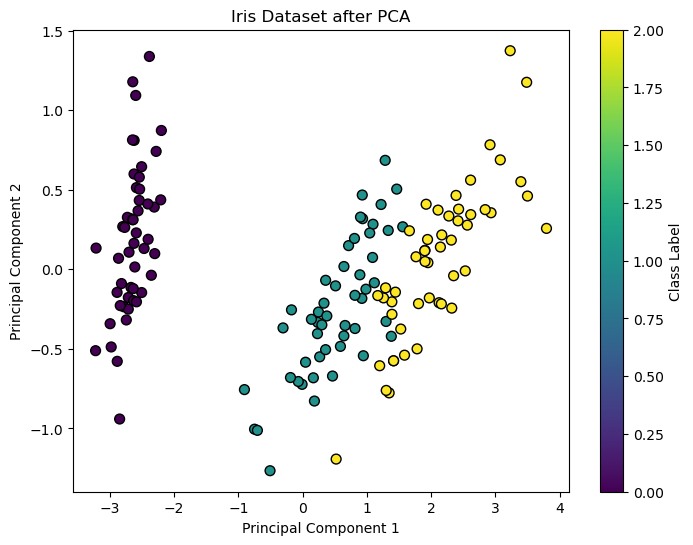

KNN分类器准确率: 100.00%


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. 加载鸢尾花数据集，划分训练集和测试集
iris = datasets.load_iris()
X = iris.data
y = iris.target

print(f"数据集包含 {len(X)} 样本和 {X.shape[1]} 特征")
print(f"特征名称：{iris.feature_names}")
print(f"目标类别名称：{iris.target_names}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"训练集样本数：{X_train.shape[0]}, 测试集样本数：{X_test.shape[0]}")

# 2. 以花萼长度为横轴，花萼宽度为纵轴绘制数据的散点图
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('Iris Dataset: Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.colorbar(label='Class Label')
plt.show()

# 3对鸢尾花数据的特征进行PCA降维，并且可视化降维后的结果，x轴为主成分1，y轴为主成分2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('Iris Dataset after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class Label')
plt.show()

#4以K=3训练分类器
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 5在测试集上进行测试，最后输出分类准确率
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN分类器准确率: {accuracy * 100:.2f}%')
